In [1]:
# Usar keras 2.2.5
# conda install -c conda-forge keras=2.2.5

In [2]:
import keras
keras.__version__

'2.8.0'

In [3]:
import numpy as np
np.__version__

'1.21.5'

In [4]:
#from keras.datasets import imdb as dataset
from tensorflow.keras.datasets import reuters as dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from matplotlib import pyplot as plt

# Cargamos y analizamos el dataset

In [5]:
# Primer hyperparámetro
num_words=30000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [6]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Number of unique words: 30000


In [7]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 145.96419665122906
Standard Deviation: 146


# Impresión de comentario preprocesado con su etiqueta

In [8]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
i = 0
print("Label:", targets[i])
# Las comentarios ya están preprocesados
print(data[i])

Label: 3
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

['mdbl:10996', 'fawc:16260', 'degussa:12089', 'woods:8803', 'hanging:13796', 'localized:20672', 'sation:20673', 'chanthaburi:20675', 'refunding:10997', 'hermann:8804', 'passsengers:20676', 'stipulate:20677', 'heublein:8352', 'screaming:20713', 'tcby:16261', 'four:185', 'grains:1642', 'broiler:20680', 'wooden:12090', 'wednesday:1220', 'highveld:13797', 'duffour:7593', '0053:20681', 'elections:3914', '270:2563', '271:3551', '272:5113', '273:3552', '274:3400', 'rudman:7975', '276:3401', '277:3478', '278:3632', '279:4309', 'dormancy:9381', 'errors:7247', 'deferred:3086', 'sptnd:20683', 'cooking:8805', 'stratabit:20684', 'designing:16262', 'metalurgicos:20685', 'databank:13798', '300er:20686', 'shocks:20687', 'nawg:7972', 'tnta:20688', 'perforations:20689', 'affiliates:2891', '27p:20690', 'ching:16263', 'china:595', 'wagyu:16264', 'affiliated:3189', 'chino:16265', 'chinh:16266', 'slickline:20692', 'doldrums:13799', 'kids:12092', 'climbed:3028', 'controversy:6693', 'kidd:20693', 'spotty:1209

In [10]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['10996:mdbl', '16260:fawc', '12089:degussa', '8803:woods', '13796:hanging', '20672:localized', '20673:sation', '20675:chanthaburi', '10997:refunding', '8804:hermann', '20676:passsengers', '20677:stipulate', '8352:heublein', '20713:screaming', '16261:tcby', '185:four', '1642:grains', '20680:broiler', '12090:wooden', '1220:wednesday', '13797:highveld', '7593:duffour', '20681:0053', '3914:elections', '2563:270', '3551:271', '5113:272', '3552:273', '3400:274', '7975:rudman', '3401:276', '3478:277', '3632:278', '4309:279', '9381:dormancy', '7247:errors', '3086:deferred', '20683:sptnd', '8805:cooking', '20684:stratabit', '16262:designing', '20685:metalurgicos', '13798:databank', '20686:300er', '20687:shocks', '7972:nawg', '20688:tnta', '20689:perforations', '2891:affiliates', '20690:27p', '16263:ching', '595:china', '16264:wagyu', '3189:affiliated', '16265:chino', '16266:chinh', '20692:slickline', '13799:doldrums', '12092:kids', '3028:climbed', '6693:controversy', '20693:kidd', '12093:spott

In [11]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[1]] )
print(data[1])
print()
print(decoded)

[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]

# generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo # turnover in 1986 was 17 5 billion belgian francs reuter 3


In [12]:
import pandas as pd

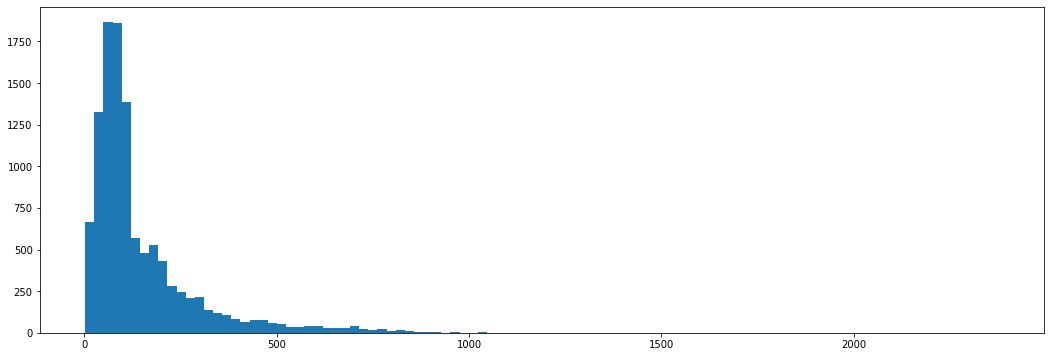

In [13]:
lengths = [len(article) for article in data]
plt.figure(figsize = (18,6))
plt.hist(lengths, bins = 100)
plt.show()

# Padding y formateo de data para entrenar

In [14]:
# Hyperparametro - Longitud máxima de comentario
maxlen=1000

In [15]:
data = pad_sequences(data,maxlen=maxlen)

In [16]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [17]:
data=np.array(data)

In [18]:
data.shape

(11228, 1000)

# Armar una MLP con one-hot encoding para resolver el problema

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
#cant de categorias (0 a 45)
salida_densa = 46
#1-hot-encoding para 30000 palabras, long secuencia 1000
input_shape = (1000 * 30000, )
model.add(Dense(salida_densa, input_shape=input_shape, activation='softmax'))

ResourceExhaustedError: ignored

In [ ]:
model.summary()

## ¿Por que no es viable esta red?

La cantidad de parametros es muy grande y no entra en la memoria

# Armar una MLP usando Embeddings

In [24]:
from tensorflow.keras.layers import Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
# Cantidad de palabras totales contando las reservadas (start of sequence, end of sequence, la mascara none)
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 46
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 32)          960096    
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dropout (Dropout)           (None, 32000)             0         
                                                                 
 dense_1 (Dense)             (None, 46)                1472046   
                                                                 
Total params: 2,432,142
Trainable params: 2,432,142
Non-trainable params: 0
_________________________________________________________________


In [27]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
model.fit(data,targets,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
281/281 [==============================] - 5s 10ms/step - loss: 2.0305 - accuracy: 0.4874 - val_loss: 1.6818 - val_accuracy: 0.5908
Epoch 2/5
281/281 [==============================] - 2s 8ms/step - loss: 1.2632 - accuracy: 0.7010 - val_loss: 1.3770 - val_accuracy: 0.6790
Epoch 3/5
281/281 [==============================] - 2s 8ms/step - loss: 0.7447 - accuracy: 0.8311 - val_loss: 1.2823 - val_accuracy: 0.6928
Epoch 4/5
281/281 [==============================] - 2s 8ms/step - loss: 0.4819 - accuracy: 0.8987 - val_loss: 1.2690 - val_accuracy: 0.7048
Epoch 5/5
281/281 [==============================] - 2s 8ms/step - loss: 0.3373 - accuracy: 0.9343 - val_loss: 1.2890 - val_accuracy: 0.7079


# Armar una CNN
Abajo hay un ejemplo de arquitectura

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding_12 (Embedding)     (None, 1000, 32)          960096    
# _________________________________________________________________
# conv1d_7 (Conv1D)            (None, 1000, 64)          14400     
# _________________________________________________________________
# max_pooling1d_4 (MaxPooling1 (None, 500, 64)           0         
# _________________________________________________________________
# conv1d_8 (Conv1D)            (None, 500, 128)          57472     
# _________________________________________________________________
# global_max_pooling1d_4 (Glob (None, 128)               0         
# _________________________________________________________________
# dropout_4 (Dropout)          (None, 128)               0         
# _________________________________________________________________
# dense_19 (Dense)             (None, 46)                5934      
# =================================================================

In [32]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [42]:
# Cantidad de palabras totales contando las reservadas (start of sequence, end of sequence, la mascara none)
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=32
salida_capa_densa = 46
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Conv1D(64,3,padding='same', name='conv1d_7', activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2, name='max_pooling1d_4'))
model.add(Conv1D(128,3,padding='same', name='conv1d_8', activation='relu'))
model.add(GlobalMaxPooling1D(name='global_max_pooling1d_4'))
model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='softmax'))

In [43]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [45]:
model.fit(data,targets,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
281/281 [==============================] - 6s 18ms/step - loss: 2.1709 - accuracy: 0.4591 - val_loss: 1.7790 - val_accuracy: 0.5356
Epoch 2/10
281/281 [==============================] - 4s 16ms/step - loss: 1.6425 - accuracy: 0.5841 - val_loss: 1.5167 - val_accuracy: 0.6362
Epoch 3/10
281/281 [==============================] - 5s 17ms/step - loss: 1.3685 - accuracy: 0.6683 - val_loss: 1.3416 - val_accuracy: 0.6817
Epoch 4/10
281/281 [==============================] - 4s 16ms/step - loss: 1.1490 - accuracy: 0.7169 - val_loss: 1.2808 - val_accuracy: 0.6897
Epoch 5/10
281/281 [==============================] - 4s 16ms/step - loss: 0.9890 - accuracy: 0.7469 - val_loss: 1.2265 - val_accuracy: 0.7146
Epoch 6/10
281/281 [==============================] - 5s 17ms/step - loss: 0.8623 - accuracy: 0.7812 - val_loss: 1.2205 - val_accuracy: 0.7337
Epoch 7/10
281/281 [==============================] - 5s 17ms/step - loss: 0.7593 - accuracy: 0.8085 - val_loss: 1.2379 - val_accuracy: 0.7333

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 32)          960096    
                                                                 
 conv1d_7 (Conv1D)           (None, 1000, 64)          6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 500, 64)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 500, 128)          24704     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)              